In [1]:
import sys
try:
  sys.modules.pop('SimpleNeural')
  sys.modules.pop('SimpleNeural.SimpleNeural')
except:
  print('Cleared')

Cleared


In [65]:
from SimpleNeural.SimpleNeural import NN, min_max_scale
import pandas as pd
import numpy as np

In [66]:
df = pd.read_csv(r'./csv/train.csv')
pd.options.display.max_columns = 999

In [67]:
for i in df[list(set(df.columns) - set(df.corr().columns))]:
  print(f'  {i}')
  print(dict(df[i].value_counts()), '\n')

  SaleCondition
{'Normal': 1197, 'Partial': 125, 'Abnorml': 101, 'Family': 20, 'Alloca': 12, 'AdjLand': 4} 

  ExterCond
{'TA': 1281, 'Gd': 146, 'Fa': 28, 'Ex': 3, 'Po': 1} 

  Electrical
{'SBrkr': 1333, 'FuseA': 94, 'FuseF': 27, 'FuseP': 3, 'Mix': 1} 

  LotConfig
{'Inside': 1051, 'Corner': 263, 'CulDSac': 94, 'FR2': 47, 'FR3': 4} 

  BsmtFinType1
{'Unf': 430, 'GLQ': 418, 'ALQ': 220, 'BLQ': 147, 'Rec': 133, 'LwQ': 74} 

  BsmtCond
{'TA': 1310, 'Gd': 65, 'Fa': 45, 'Po': 2} 

  ExterQual
{'TA': 906, 'Gd': 487, 'Ex': 52, 'Fa': 14} 

  Condition1
{'Norm': 1259, 'Feedr': 81, 'Artery': 48, 'RRAn': 26, 'PosN': 19, 'RRAe': 11, 'PosA': 8, 'RRNn': 5, 'RRNe': 2} 

  BsmtQual
{'TA': 648, 'Gd': 618, 'Ex': 121, 'Fa': 35} 

  LandContour
{'Lvl': 1310, 'Bnk': 63, 'HLS': 50, 'Low': 36} 

  Exterior1st
{'VinylSd': 515, 'HdBoard': 221, 'MetalSd': 220, 'Wd Sdng': 206, 'Plywood': 108, 'CemntBd': 61, 'BrkFace': 50, 'WdShing': 26, 'Stucco': 25, 'AsbShng': 20, 'BrkComm': 2, 'Stone': 2, 'CBlock': 1, 'ImStucc'

In [68]:
cat_cols = ['Neighborhood', 'Foundation']
ord_cols = ['HeatingQC', 'LandSlope', 'BsmtCond', 'GarageQual',
            'FireplaceQu', 'ExterQual', 'KitchenQual']

In [69]:
df_1hot = pd.get_dummies(df[cat_cols],drop_first=True)
df_1hot.head()

,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [70]:
remap_qal = {
    'NA': 0, # NA
    'Po': 1, # poor
    'TA': 2, # typical
    'Fa': 3, # fair
    'Gd': 4, # good
    'Ex': 5, # excellent
    'Gtl': 0, # gentle
    'Mod': 1, # moderate
    'Sev': 2, # severe
}

df[ord_cols] = df[ord_cols].replace(remap_qal)
df[ord_cols].head()

,HeatingQC,LandSlope,BsmtCond,GarageQual,FireplaceQu,ExterQual,KitchenQual
0,5,0,2.0,2.0,NaN,4,4
1,5,0,2.0,2.0,2.0,2,2
2,5,0,2.0,2.0,2.0,4,4
3,4,0,4.0,2.0,4.0,2,4
4,5,0,2.0,2.0,2.0,4,4


In [71]:
df = df.fillna(0)

df = df[df.select_dtypes(exclude=['object']).columns]
df = pd.concat((df, df_1hot), axis=1)

X = df
y = pd.DataFrame(X.pop('SalePrice'))

ymax, ymin = y.max(), y.min()

y = min_max_scale(y)
X = min_max_scale(X)

C:\Users\pluketina\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\pluketina\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [72]:
nn1 = NN(X, y, [50, 100, 20, 100], loss_function='mae', bias=-4.2, validation_percent=.1)
nn1.train(1000, 200)

Test error: 0.298066	 Validation Error: 0.095225
Test error: 0.049323	 Validation Error: 0.049559
Test error: 0.04573	 Validation Error: 0.041981
Test error: 0.034729	 Validation Error: 0.036278
Test error: 0.0333	 Validation Error: 0.031861


In [50]:
(0.025576 * (ymax-ymin)) + ymin

SalePrice    53317.2776
dtype: float64

In [ ]:
nn1.plot_test_validation()

In [ ]:
nn = NN(X, y, [50, 100], loss_function='mae', bias=-4.2, validation_set=False)
nn.train(100,10)

In [ ]:
nn = NN(X, y, [50, 20, 100, 20])
nn.find_best_bias(nn_epochs=400)

In [ ]:
nn.bias_score_df[:5]

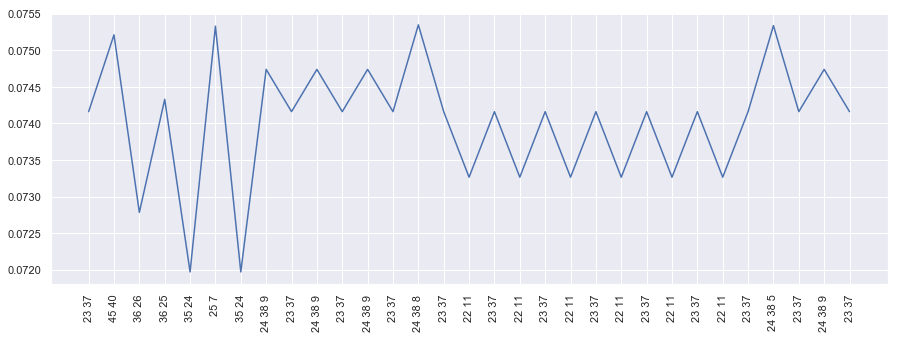

In [63]:
nn = NN(X, y, bias=-4)
nn.genetic_alogrithm(20, nn_epochs=300)

In [43]:
df_test = pd.read_csv('./csv/test.csv')

df_test[ord_cols] = df_test[ord_cols].replace(remap_qal)

df_test.fillna(0, inplace=True)

df_test_1hot = pd.get_dummies(df_test[cat_cols], drop_first=True)
df_test = pd.concat((df_test[df_test.select_dtypes(exclude=['object']).columns], df_test_1hot), axis=1)

X = min_max_scale(df_test)

C:\Users\pluketina\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [44]:
print(set(df_test.columns) - set(df.columns))
print(set(df.columns) - set(df_test.columns))

set()
set()


In [45]:
prediction = (nn1.predict(X) * [ymax-ymin]) + [ymin]
prediction

array([[125630.50009179],
       [151129.85639219],
       [180708.30240843],
       ...,
       [177901.97068184],
       [ 98817.49297095],
       [227646.23857408]])

In [46]:
df_final = pd.DataFrame(prediction)
df_final['Id'] = df_final.index + 1461
df_final = df_final.rename(columns={0:'SalePrice'})
df_final = df_final[['Id', 'SalePrice']]
df_final.head()

,Id,SalePrice
0,1461,125630.500092
1,1462,151129.856392
2,1463,180708.302408
3,1464,181571.745761
4,1465,193567.379385


In [47]:
df_final.to_csv('csv/output.csv', index=False)